# Measuring Influence on Instagram

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

In [2]:
usersData = pd.read_csv('instagram_data/usersData.csv', sep=',')
display(usersData.shape)
usersData.head(20)

(114781, 7)

,avg_likes,avg_comments,avg_followers,avg_posts,max_likes,min_likes,avg_views
0,97.5000,3.0000,13178.0,1967.0,113,59,333.1667
1,91.7500,9.2500,4228.0,1402.0,174,39,308.6250
2,33.0000,3.5000,2212.0,2471.0,46,23,126.7500
3,20.0000,3.5000,203.0,1838.0,26,16,65.5000
4,13.2000,1.2000,132.0,309.0,18,9,61.2000
5,109.1111,8.8889,2074.0,1583.0,215,60,638.4444
6,153.0000,12.6667,1718.0,4865.0,246,37,428.6667
7,50.5000,12.5000,511.0,739.0,62,35,148.1667
8,35.0000,0.6000,1216.0,2435.0,42,25,117.6000
9,32.0000,6.0000,1019.0,8328.0,53,14,90.0000


In [3]:
usersData.describe()

,avg_likes,avg_comments,avg_followers,avg_posts,max_likes,min_likes,avg_views
count,1.147810e+05,114781.000000,1.147810e+05,114781.000000,1.147810e+05,1.147810e+05,1.147810e+05
mean,8.980949e+02,27.756262,6.016005e+04,995.570356,1.365752e+03,5.694098e+02,7.276758e+03
std,1.063233e+04,774.559009,1.115905e+06,1927.328265,1.490799e+04,7.615014e+03,7.385628e+04
min,1.000000e+00,0.000000,3.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.500000e+00
25%,7.966670e+01,2.833300,1.384000e+03,194.000000,1.080000e+02,4.800000e+01,2.213333e+02
50%,1.579286e+02,6.571400,4.583000e+03,479.000000,2.150000e+02,1.050000e+02,6.073333e+02
75%,3.745000e+02,14.800000,1.626000e+04,1105.000000,5.460000e+02,2.400000e+02,2.072500e+03
max,1.629037e+06,242543.187500,2.316562e+08,140014.000000,2.068986e+06,1.279511e+06,1.283367e+07


In [4]:
followers_views = pd.read_csv('instagram_data/followers_views.csv', sep=',')
display(followers_views.shape)
followers_views.head(20)

(1422894, 2)

,followers,views
0,13178,250
1,13178,604
2,13178,239
3,13178,858
4,13178,271
5,13178,317
6,13178,318
7,13178,126
8,4228,372
9,4228,404


In [5]:
followers_views.describe()

,followers,views
count,1.422894e+06,1.422894e+06
mean,1.019482e+05,1.697887e+04
std,1.426782e+06,3.572234e+05
min,0.000000e+00,1.000000e+00
25%,1.786000e+03,2.620000e+02
50%,6.393000e+03,8.350000e+02
75%,2.342400e+04,3.814000e+03
max,2.312398e+08,2.825005e+08


In [6]:
likes_views = pd.read_csv('instagram_data/likes_views.csv', sep=',')
display(likes_views.shape)
likes_views.head(20)

(1426188, 2)

,likes,views
0,98,250
1,100,604
2,109,239
3,103,858
4,106,271
5,59,317
6,113,318
7,57,126
8,172,372
9,87,404


In [7]:
likes_views.describe()

,likes,views
count,1.426188e+06,1.426188e+06
mean,1.512143e+03,1.706994e+04
std,1.306588e+04,3.570242e+05
min,1.000000e+00,1.000000e+00
25%,8.900000e+01,2.620000e+02
50%,1.930000e+02,8.350000e+02
75%,5.550000e+02,3.820000e+03
max,2.085029e+06,2.825005e+08


## Plots

In [14]:
log_avg_views=[]
for i in range(len(usersData['avg_views'])):
    log_avg_views.append(math.log((usersData['avg_views'])[i]))

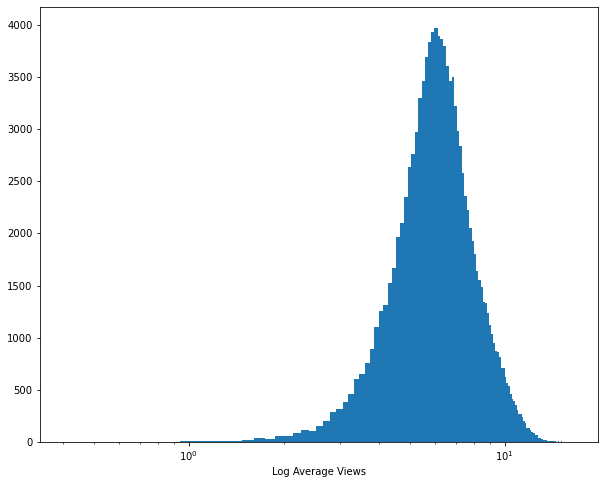

In [24]:
plt.figure(figsize=(10,8))
plt.hist(log_avg_views,bins=120)
plt.xlabel('Log Average Views')
plt.xscale("log")

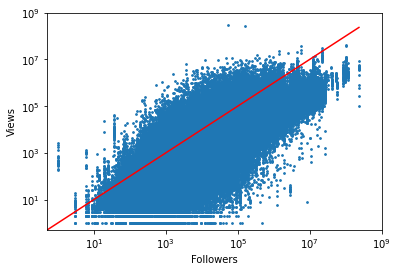

In [11]:
plt.scatter(followers_views['followers'],followers_views['views'],s=3)
plt.xlabel('Followers')
plt.ylabel('Views')
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.5,1000000000)
plt.ylim(0.5,1000000000)
x = np.linspace(followers_views['followers'].min(),followers_views['followers'].max(),1000)
plt.plot(x,x, c="red")

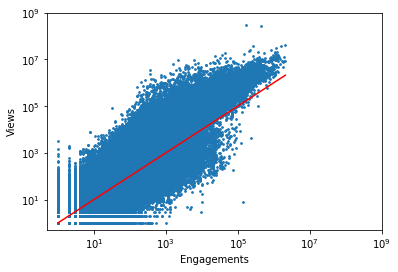

In [12]:
plt.scatter(likes_views['likes'],likes_views['views'],s=3)
plt.xlabel('Engagements')
plt.ylabel('Views')
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.5,1000000000)
plt.ylim(0.5,1000000000)
x = np.linspace(likes_views['likes'].min(),likes_views['likes'].max(),1000)
plt.plot(x,x, c="red")

## Univariate Outliers Removal